In [229]:
import pandas as pd
pd.options.display.max_columns=100
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [291]:
df_lohhla = pd.read_excel("data/TracerX LILAC vs LOHHLA results.xlsx").rename(columns={"#":"Allele_ID","LOHHLAFinal":"Tx100_Allele","Allele":"LILAC_Allele","HomAlleleLILAC":"LOH_Allele_LILAC"}).sort_values(["Key","Allele_ID"])
df_typing=df_lohhla[["Sample","Allele_ID","Tx100_Allele","LILAC_Allele","Match","AlleleCuration"]]
df_typing["patient"] = df_typing.apply(lambda row: row["Sample"].split("_")[0],axis=1)

/home/fran/miniconda3/envs/global/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [317]:
df_typing[(df_typing["Tx100_Allele"]!="HOM")].to_csv("data/hlaI_typing_tx_LILAC_comparison.tsv",sep="\t",index=False)

### By patient and by total number of alleles

In [292]:
total_patients = len(df_typing["patient"].unique())
match=df_typing[(df_typing["Match"])|(df_typing["AlleleCuration"]=="MATCH")]
# Number of patients
x=match.groupby("patient",as_index=False).agg({"Allele_ID":"count"})
patients_full_agreement = len(x[x["Allele_ID"]==6]["patient"].unique())
# number of alleles
total_alleles=df_typing.shape[0]
correct_alleles=df_typing[(df_typing["Match"])|(df_typing["AlleleCuration"]=="MATCH")].shape[0]


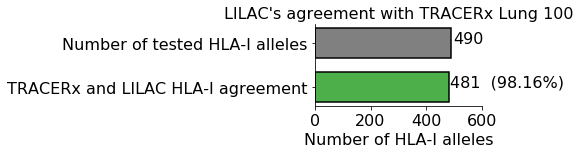

In [296]:
fig,ax = plt.subplots(figsize=(3,1.5))
yticks_labels = []
yticks = []
y=0
yticks.append(y)
yticks_labels.append("Number of tested HLA-I alleles")
ax.barh(y=y,width=total_alleles,color="grey",edgecolor="black",linewidth=1.5,height=0.7)
ax.annotate(xy=(total_alleles+5,y),s=str(total_alleles),fontsize=16 )

y-=1
yticks_labels.append("TRACERx and LILAC HLA-I agreement")
yticks.append(y)
ax.barh(y=y,width=correct_alleles,color="#4daf4a",edgecolor="black",linewidth=1.5,height=0.7)
ax.annotate(xy=(correct_alleles+5,y),s=str(correct_alleles) + "  ({0:.2%})".format(correct_alleles/total_alleles),fontsize=16)

ax.set_yticks(yticks)
ax.set_yticklabels(yticks_labels)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Number of HLA-I alleles",fontsize=16)
ax.set_title("LILAC's agreement with TRACERx Lung 100",fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlim(0,600)
plt.savefig(f'../results/figures/figure1/tx100_LILAC_hlatypes_full_cohort.pdf', dpi=800,bbox_inches="tight")

### Same analysis excluding HOM calls...

In [294]:
total_alleles=df_typing[(df_typing["Tx100_Allele"]!="HOM")].shape[0]
correct_alleles=df_typing[(df_typing["Tx100_Allele"]!="HOM")&((df_typing["Match"])|(df_typing["AlleleCuration"]=="MATCH"))].shape[0]

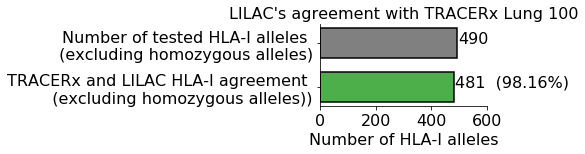

In [297]:
fig,ax = plt.subplots(figsize=(3,1.5))
yticks_labels = []
yticks = []
y=0
yticks.append(y)
yticks_labels.append("Number of tested HLA-I alleles \n (excluding homozygous alleles)")
ax.barh(y=y,width=total_alleles,color="grey",edgecolor="black",linewidth=1.5,height=0.7)
ax.annotate(xy=(total_alleles+5,y),s=str(total_alleles),fontsize=16 )

y-=1
yticks_labels.append("TRACERx and LILAC HLA-I agreement \n  (excluding homozygous alleles))")
yticks.append(y)
ax.barh(y=y,width=correct_alleles,color="#4daf4a",edgecolor="black",linewidth=1.5,height=0.7)
ax.annotate(xy=(correct_alleles+5,y),s=str(correct_alleles) + "  ({0:.2%})".format(correct_alleles/total_alleles),fontsize=16)

ax.set_yticks(yticks)
ax.set_yticklabels(yticks_labels)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Number of HLA-I alleles",fontsize=16)
ax.set_title("LILAC's agreement with TRACERx Lung 100",fontsize=16)
ax.set_xlim(0,600)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.savefig(f'../results/figures/figure1/tx100_LILAC_hlatypes_non_homozygous_cohort.pdf', dpi=800,bbox_inches="tight")

### Evaluate LOH of HLA agreement

In [307]:
df_lohhla = pd.read_excel("data/TracerX LILAC vs LOHHLA results.xlsx").rename(columns={"#":"Allele_ID","LOHHLAFinal":"Tx100_Allele","Allele":"LILAC_Allele","HomAlleleLILAC":"LOH_Allele_LILAC"}).sort_values(["Key","Allele_ID"])
df_lohhla["patient"] = df_lohhla.apply(lambda row: row["Sample"].split("_")[0],axis=1)
df_lohhla["LOHLHLA Purity"] = df_lohhla.apply(lambda r: float(str(r["LOHLHLA Purity"]).replace("na","nan")),axis=1)
purity = df_lohhla[np.isfinite(df_lohhla["LOHLHLA Purity"])][["Sample","LOHLHLA Purity"]].set_index("Sample").to_dict()["LOHLHLA Purity"]
df_lohhla["purity"] = df_lohhla.apply(lambda row: purity[row["Sample"]] if row["Sample"] in purity else np.nan,axis=1)

In [316]:
df_lohhla[["patient","Sample","purity","Allele_ID","Tx100_Allele","LILAC_Allele","LOH_Allele_LILAC","LILACGeneLOH","LOHHLAGeneLOH","Mismatches"]].sort_values(["Sample","Allele_ID"]).to_csv("data/lohhla_lilac_loh_comparison.tsv",sep="\t",index=False)

### Including HOM

In [300]:
total_alleles = df_lohhla.shape[0]
match=df_lohhla[(df_lohhla["Mismatches"]==False)].shape[0]
# Low purity samples > 0.3
total_alleles_lp = df_lohhla[(df_lohhla["purity"]<0.3)].shape[0]
match_lp=df_lohhla[(df_lohhla["Mismatches"]==False)&(df_lohhla["purity"]>0.3)].shape[0]

# Mid purity samples > 0.3
total_alleles_hp = df_lohhla[~(df_lohhla["purity"]<0.3)].shape[0]
match_hp=df_lohhla[(df_lohhla["Mismatches"]==False)&~(df_lohhla["purity"]<0.3)].shape[0]

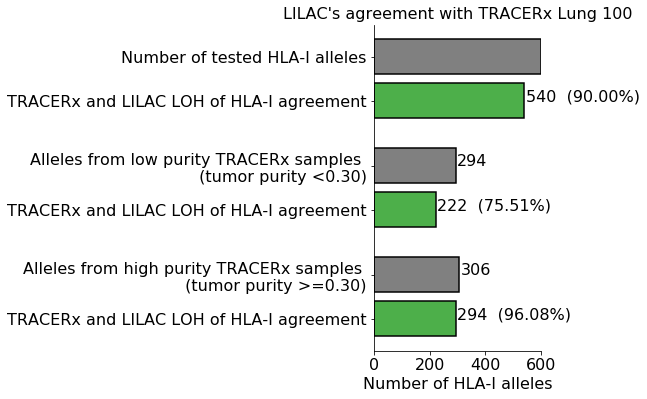

In [301]:
fig,ax = plt.subplots(figsize=(3,6))
yticks_labels = []
yticks = []
y=0
yticks.append(y)
yticks_labels.append("Number of tested HLA-I alleles")
ax.barh(y=y,width=total_alleles,color="grey",edgecolor="black",linewidth=1.5)
ax.annotate(xy=(total_alleles+5,y),s=str(total_alleles),fontsize=16 )

y-=1
yticks_labels.append("TRACERx and LILAC LOH of HLA-I agreement")
yticks.append(y)
ax.barh(y=y,width=match,color="#4daf4a",edgecolor="black",linewidth=1.5)
ax.annotate(xy=(match+5,y),s=str(match) + "  ({0:.2%})".format(match/total_alleles),fontsize=16)

y-=1.5
yticks.append(y)
yticks_labels.append("Alleles from low purity TRACERx samples \n (tumor purity <0.30)")
ax.barh(y=y,width=total_alleles_lp,color="grey",edgecolor="black",linewidth=1.5)
ax.annotate(xy=(total_alleles_lp+5,y),s=str(total_alleles_lp),fontsize=16 )

y-=1
yticks_labels.append("TRACERx and LILAC LOH of HLA-I agreement")
yticks.append(y)
ax.barh(y=y,width=match_lp,color="#4daf4a",edgecolor="black",linewidth=1.5)
ax.annotate(xy=(match_lp+5,y),s=str(match_lp) + "  ({0:.2%})".format(match_lp/total_alleles_lp),fontsize=16)

y-=1.5
yticks.append(y)
yticks_labels.append("Alleles from high purity TRACERx samples \n (tumor purity >=0.30)")
ax.barh(y=y,width=total_alleles_hp,color="grey",edgecolor="black",linewidth=1.5)
ax.annotate(xy=(total_alleles_hp+5,y),s=str(total_alleles_hp),fontsize=16 )

y-=1
yticks_labels.append("TRACERx and LILAC LOH of HLA-I agreement")
yticks.append(y)
ax.barh(y=y,width=match_hp,color="#4daf4a",edgecolor="black",linewidth=1.5)
ax.annotate(xy=(match_hp+5,y),s=str(match_hp) + "  ({0:.2%})".format(match_hp/total_alleles_hp),fontsize=16)

ax.set_yticks(yticks)
ax.set_yticklabels(yticks_labels)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Number of HLA-I alleles",fontsize=16)
ax.set_title("LILAC's agreement with TRACERx Lung 100",fontsize=16)
ax.set_xlim(0,600)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.savefig(f'../results/figures/figure1/tx100_LILAC_LOHHLA_full_cohort.pdf', dpi=800,bbox_inches="tight")

### Only including alleles for which we have the HLA-I types 

In [302]:
df_lohhla=df_lohhla[(df_lohhla["Tx100_Allele"]!="HOM")]

In [303]:
total_alleles = df_lohhla.shape[0]
match=df_lohhla[(df_lohhla["Mismatches"]==False)].shape[0]
# Low purity samples > 0.3
total_alleles_lp = df_lohhla[(df_lohhla["purity"]<0.3)].shape[0]
match_lp=df_lohhla[(df_lohhla["Mismatches"]==False)&(df_lohhla["purity"]<0.3)].shape[0]

# Mid purity samples > 0.3
total_alleles_hp = df_lohhla[~(df_lohhla["purity"]<0.3)].shape[0]
match_hp=df_lohhla[(df_lohhla["Mismatches"]==False)&~(df_lohhla["purity"]<0.3)].shape[0]

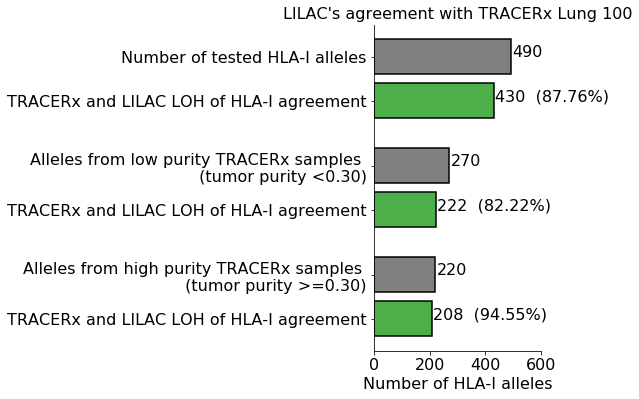

In [304]:
fig,ax = plt.subplots(figsize=(3,6))
yticks_labels = []
yticks = []
y=0
yticks.append(y)
yticks_labels.append("Number of tested HLA-I alleles")
ax.barh(y=y,width=total_alleles,color="grey",edgecolor="black",linewidth=1.5)
ax.annotate(xy=(total_alleles+5,y),s=str(total_alleles),fontsize=16 )

y-=1
yticks_labels.append("TRACERx and LILAC LOH of HLA-I agreement")
yticks.append(y)
ax.barh(y=y,width=match,color="#4daf4a",edgecolor="black",linewidth=1.5)
ax.annotate(xy=(match+5,y),s=str(match) + "  ({0:.2%})".format(match/total_alleles),fontsize=16)

y-=1.5
yticks.append(y)
yticks_labels.append("Alleles from low purity TRACERx samples \n (tumor purity <0.30)")
ax.barh(y=y,width=total_alleles_lp,color="grey",edgecolor="black",linewidth=1.5)
ax.annotate(xy=(total_alleles_lp+5,y),s=str(total_alleles_lp),fontsize=16 )

y-=1
yticks_labels.append("TRACERx and LILAC LOH of HLA-I agreement")
yticks.append(y)
ax.barh(y=y,width=match_lp,color="#4daf4a",edgecolor="black",linewidth=1.5)
ax.annotate(xy=(match_lp+5,y),s=str(match_lp) + "  ({0:.2%})".format(match_lp/total_alleles_lp),fontsize=16)

y-=1.5
yticks.append(y)
yticks_labels.append("Alleles from high purity TRACERx samples \n (tumor purity >=0.30)")
ax.barh(y=y,width=total_alleles_hp,color="grey",edgecolor="black",linewidth=1.5)
ax.annotate(xy=(total_alleles_hp+5,y),s=str(total_alleles_hp),fontsize=16 )

y-=1
yticks_labels.append("TRACERx and LILAC LOH of HLA-I agreement")
yticks.append(y)
ax.barh(y=y,width=match_hp,color="#4daf4a",edgecolor="black",linewidth=1.5)
ax.annotate(xy=(match_hp+5,y),s=str(match_hp) + "  ({0:.2%})".format(match_hp/total_alleles_hp),fontsize=16)

ax.set_yticks(yticks)
ax.set_yticklabels(yticks_labels)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Number of HLA-I alleles",fontsize=16)
ax.set_title("LILAC's agreement with TRACERx Lung 100",fontsize=16)
ax.set_xlim(0,600)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.savefig(f'../results/figures/figure1/tx100_LILAC_LOHHLA_non_homozygous_cohort.pdf', dpi=800,bbox_inches="tight")